# Comparative Analysis on Clustering

In this lab I am going to perform a comparative analysis on the clustering methods: KMeans, KMode, KMedoids and Agglormetive Clustering. For this I am going to use the same dataset I have used for classification but remove the target label and ask the clustering model to give us clusters instead.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./final_income_classification.csv')
df.head()

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,...,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales
0,90,0,77053,9,-3,0,0,4356,40,0,...,0,0,0,1,0,0,0,1,0,0
1,82,6,132870,9,-3,0,0,4356,18,0,...,0,0,0,1,0,0,1,0,0,0
2,66,0,186061,10,-3,0,0,4356,40,0,...,0,1,0,0,0,0,0,1,0,0
3,54,6,140359,4,-2,0,0,3900,40,0,...,0,0,0,1,0,0,0,1,0,0
4,41,6,264663,10,-1,0,0,3900,40,0,...,0,0,0,1,0,0,0,0,1,0


In [3]:
df.drop('income', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   age                         32561 non-null  int64
 1   workclass                   32561 non-null  int64
 2   fnlwgt                      32561 non-null  int64
 3   education.num               32561 non-null  int64
 4   marital.status              32561 non-null  int64
 5   sex                         32561 non-null  int64
 6   capital.gain                32561 non-null  int64
 7   capital.loss                32561 non-null  int64
 8   hours.per.week              32561 non-null  int64
 9   Race_Amer-Indian-Eskimo     32561 non-null  int64
 10  Race_Asian-Pac-Islander     32561 non-null  int64
 11  Race_Black                  32561 non-null  int64
 12  Race_Other                  32561 non-null  int64
 13  Race_White                  32561 non-null  int64
 14  occupa

In [5]:
df.describe()

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,5.178803,1.897784e+05,10.080679,0.538958,0.669205,1077.648844,87.303830,40.437456,0.009551,0.031909,0.095943,0.008323,0.854274,0.115783,0.125887,0.124873,0.394214,0.127146,0.112097
std,13.640433,1.729629,1.055500e+05,2.572720,1.555730,0.470506,7385.292085,402.960219,12.347429,0.097264,0.175761,0.294518,0.090851,0.352837,0.319969,0.331727,0.330580,0.488689,0.333142,0.315491
min,17.000000,0.000000,1.228500e+04,1.000000,-3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,5.000000,1.178270e+05,9.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,6.000000,1.783560e+05,10.000000,0.000000,1.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,6.000000,2.370510e+05,12.000000,2.000000,1.000000,0.000000,0.000000,45.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,90.000000,7.000000,1.484705e+06,16.000000,3.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Visulization

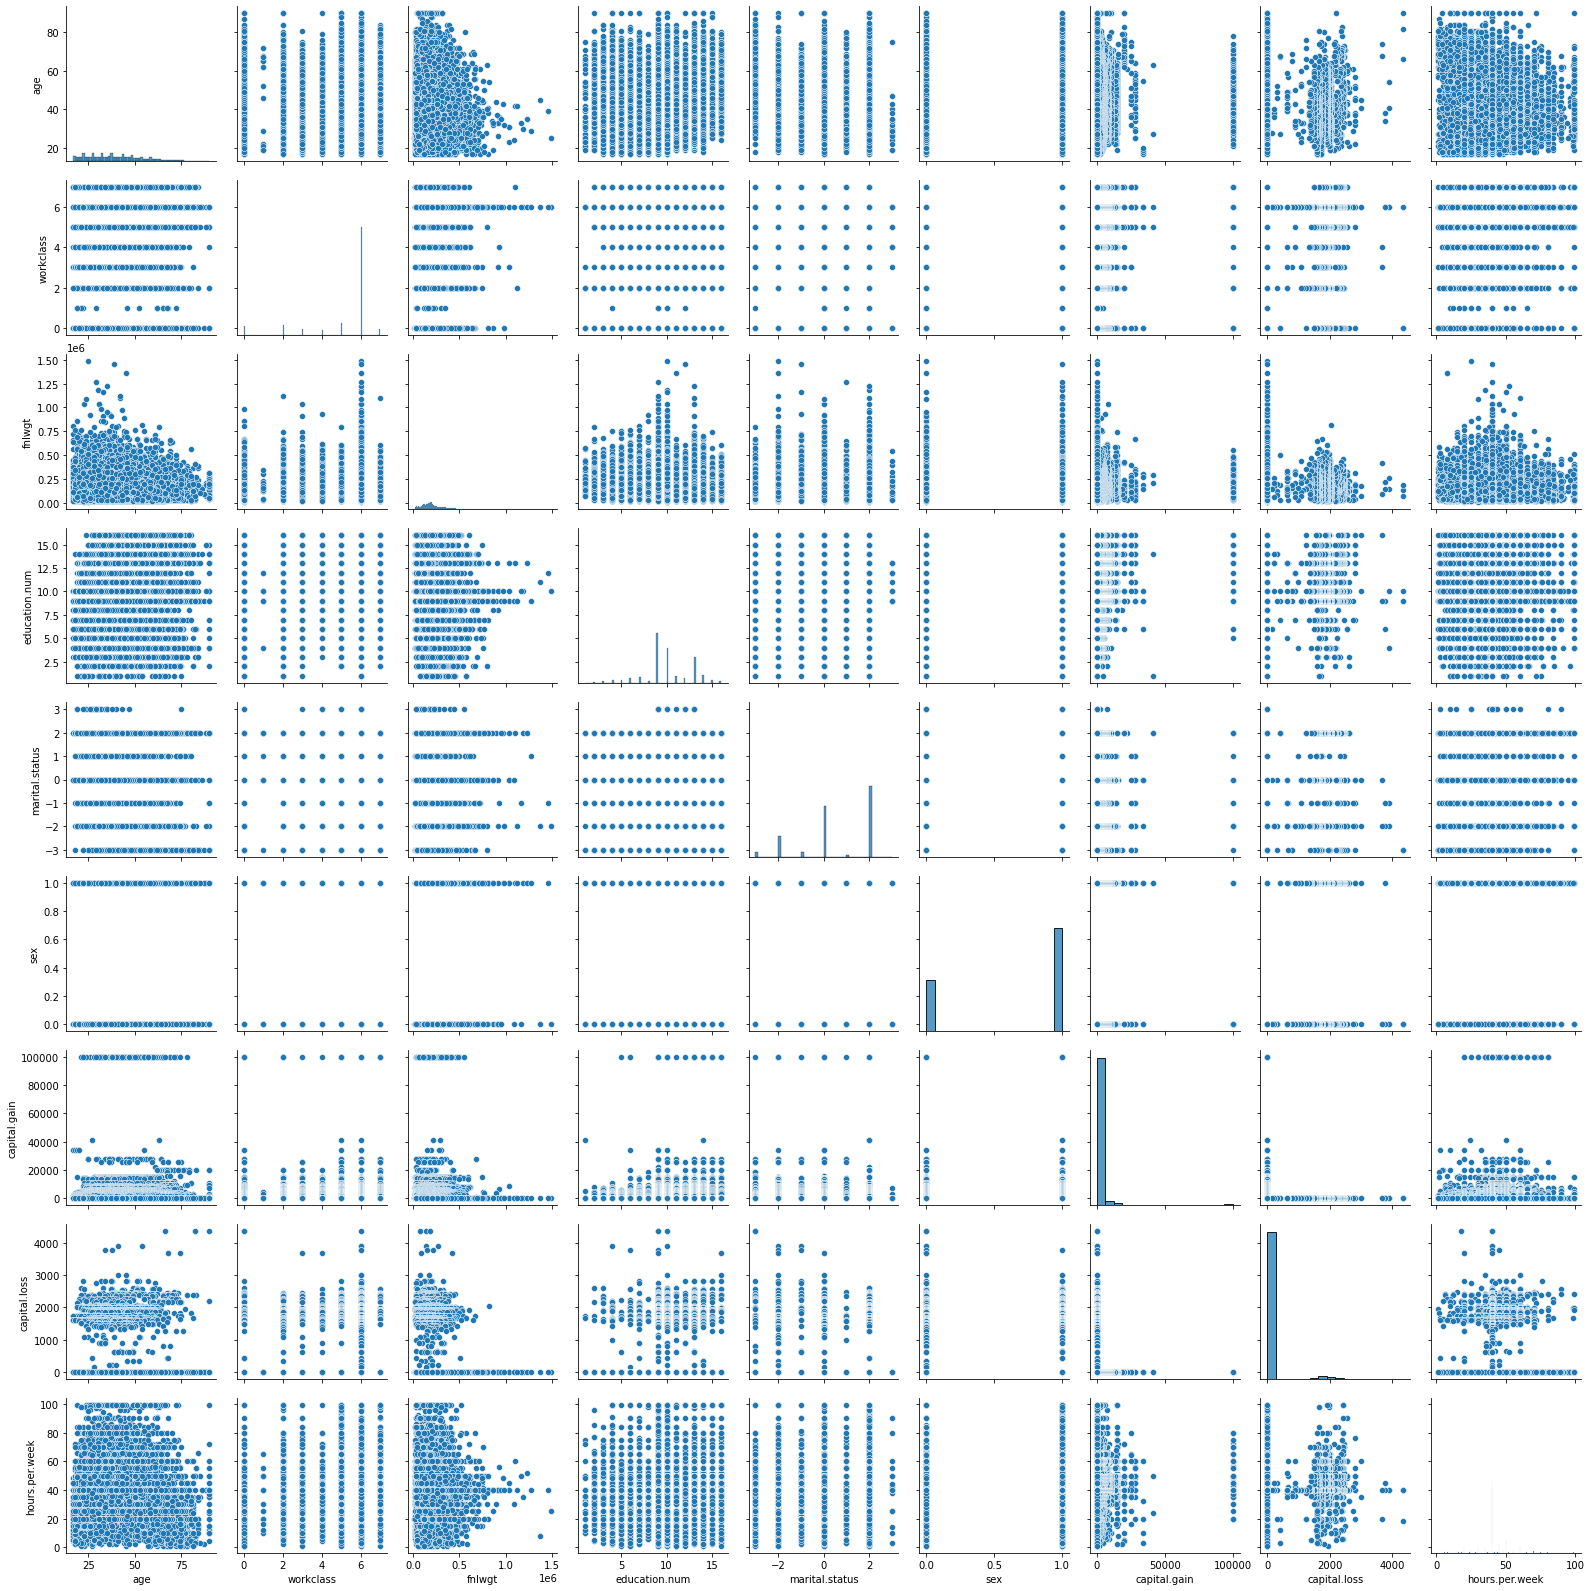

In [6]:
sns.pairplot(data=df[['age', 'workclass', 'fnlwgt', 'education.num', 'marital.status', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week']])

Text(0.5, 0.92, 'Viewing clusters for income')

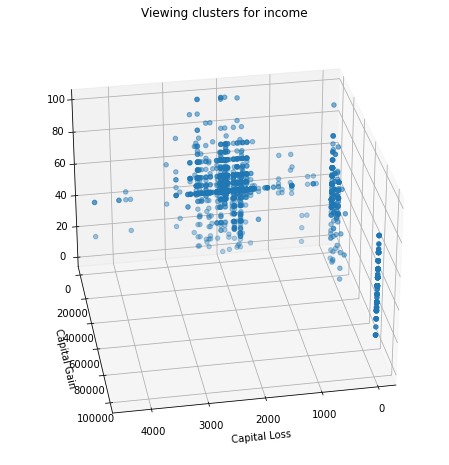

In [7]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = (df['capital.loss'][:2000], df['capital.gain'][:2000], df['hours.per.week'][:2000])
ax.scatter(x, y, z)
ax.view_init(30, 80)
plt.xlabel('Capital Loss')
plt.ylabel('Capital Gain')
plt.title('Viewing clusters for income')

Text(0.5, 0.92, 'Viewing clusters for income')

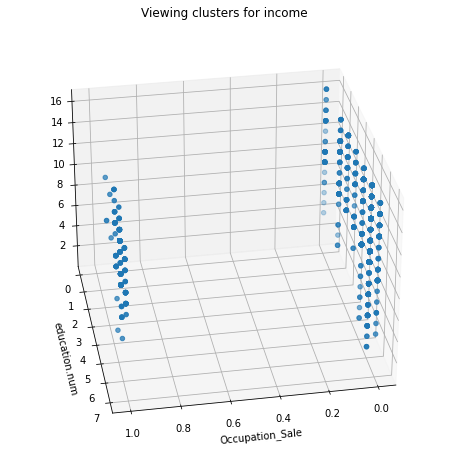

In [8]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = (df['occupation_Sales'][:2000], df['workclass'][:2000], df['education.num'][:2000])
ax.scatter(x, y, z)
ax.view_init(30, 80)
plt.xlabel('Occupation_Sale')
plt.ylabel('education.num')
plt.title('Viewing clusters for income')

## Clustering the data

In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler

Scaling the data as the model can better analyse the distance and compare two values.

In [6]:
for column in df.columns:
    scaler = MinMaxScaler()
    scaler.fit(df[column].values.reshape(-1, 1))
    df[column] = scaler.transform(df[column].values.reshape(-1, 1))

In [7]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,Race_Amer-Indian-Eskimo,Race_Asian-Pac-Islander,Race_Black,Race_Other,Race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales
0,1.000000,0.000000,0.043987,0.533333,0.000000,0.0,0.0,1.000000,0.397959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.890411,0.857143,0.081896,0.533333,0.000000,0.0,0.0,1.000000,0.173469,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.671233,0.000000,0.118021,0.600000,0.000000,0.0,0.0,1.000000,0.397959,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.506849,0.857143,0.086982,0.200000,0.166667,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.328767,0.857143,0.171404,0.600000,0.333333,0.0,0.0,0.895317,0.397959,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
def make_cluster_plot(data, n_clusters, x, y):
    for cluster in range(n_clusters):
        tdf = data[data['clusters'] == cluster]
        plt.scatter(tdf[x], tdf[y], label=cluster)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()

## KMeans

In [12]:
from scipy.spatial.distance import cdist

In [11]:
distortions = []
inertias = []
k_disto_map = {}
k_inert_map = {}
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df)
    disto = sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0]
    inert = model.inertia_
    distortions.append(disto)
    inertias.append(inert)
    k_disto_map[k] = disto
    k_inert_map[k] = inert

In [12]:
for key, value in k_disto_map.items():
    print("{} : {}".format(key, value))

1 : 1.1900549494354027
2 : 1.0411851210047496
3 : 0.9644638640235869
4 : 0.9050608701618206
5 : 0.8165941445549437
6 : 0.7433553285402396
7 : 0.6885509588566029
8 : 0.626699227888488
9 : 0.6118881000779263


In [13]:
for key, value in k_inert_map.items():
    print("{} : {}".format(key, value))

1 : 48185.51407104482
2 : 38571.9764641785
3 : 33091.54388040917
4 : 29690.224911555724
5 : 25687.570177507638
6 : 21697.3813074771
7 : 18514.176928619512
8 : 16032.024297876596
9 : 14997.94994912539


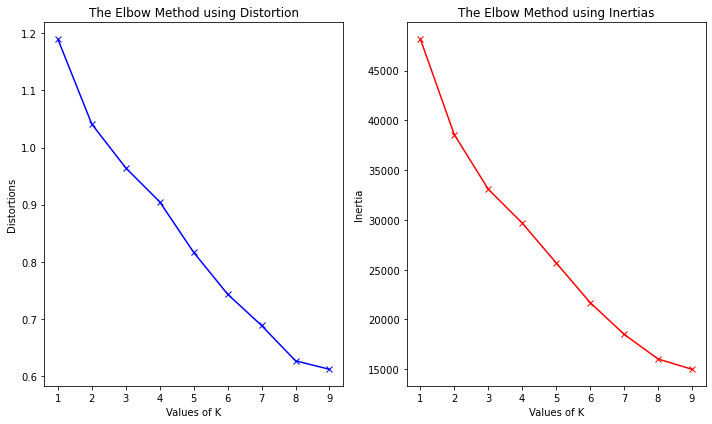

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10,6)) 
axes[0].plot(K, distortions, 'bx-')
axes[0].set_xlabel('Values of K')
axes[0].set_ylabel('Distortions')
axes[0].set_title('The Elbow Method using Distortion')

axes[1].plot(K, inertias, 'rx-')
axes[1].set_xlabel('Values of K')
axes[1].set_ylabel('Inertia')
axes[1].set_title('The Elbow Method using Inertias')
fig.tight_layout()

Best K Value is the point after which the relation becomes linear in both plots. Here it is either 2 or 5

In [13]:
# K - 2
kmeans_model_2 = KMeans(n_clusters=2)
kmeans_clusters_2 = kmeans_model_2.fit_predict(df)

In [14]:
pd.DataFrame(kmeans_clusters_2).value_counts()

0    19725
1    12836
dtype: int64

In [15]:
kmeans_model_2.cluster_centers_

array([[3.05270066e-01, 7.81444867e-01, 1.19920954e-01, 6.53387410e-01,
        6.02179975e-01, 6.60532319e-01, 1.51273761e-02, 2.41933682e-02,
        4.15161015e-01, 8.31432193e-03, 3.33079848e-02, 7.45754119e-02,
        6.13434728e-03, 8.77667934e-01, 1.91128010e-01, 2.07807351e-01,
        2.06134347e-01, 5.88418203e-15, 2.09885932e-01, 1.85044360e-01],
       [2.80838993e-01, 6.75878111e-01, 1.21504825e-01, 5.31603823e-01,
        5.70842422e-01, 6.82533500e-01, 4.09078023e-03, 1.36631299e-02,
        3.82848621e-01, 1.14521658e-02, 2.97600499e-02, 1.28778436e-01,
        1.16858835e-02, 8.18323465e-01, 6.24500451e-16, 8.04911693e-16,
        1.65145675e-15, 1.00000000e+00, 1.69309011e-15, 7.63278329e-16]])

In [16]:
kmeans_df = pd.concat([df, pd.Series(kmeans_clusters_2)], axis=1)
kmeans_df.rename(columns={0: 'clusters'}, inplace=True)
kmeans_df.head()

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,Race_Amer-Indian-Eskimo,...,Race_Black,Race_Other,Race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,clusters
0,1.000000,0.000000,0.043987,0.533333,0.000000,0.0,0.0,1.000000,0.397959,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.890411,0.857143,0.081896,0.533333,0.000000,0.0,0.0,1.000000,0.173469,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.671233,0.000000,0.118021,0.600000,0.000000,0.0,0.0,1.000000,0.397959,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,0.506849,0.857143,0.086982,0.200000,0.166667,0.0,0.0,0.895317,0.397959,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,0.328767,0.857143,0.171404,0.600000,0.333333,0.0,0.0,0.895317,0.397959,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


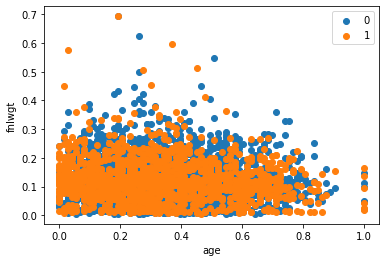

In [17]:
make_cluster_plot(kmeans_df[:5000], 2, 'age', 'fnlwgt')

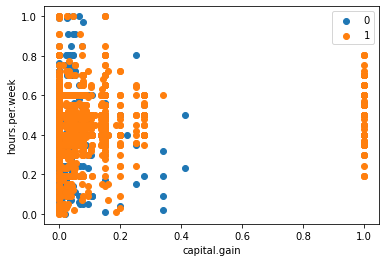

In [22]:
make_cluster_plot(kmeans_df[:5000], 2, 'capital.gain', 'hours.per.week')

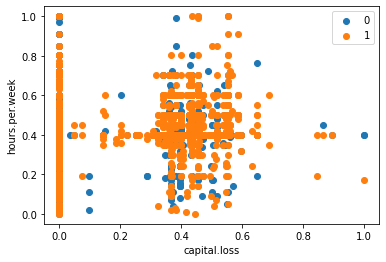

In [23]:
make_cluster_plot(kmeans_df[:5000], 2, 'capital.loss', 'hours.per.week')

In [35]:
kmean_colors = []
for cluster in kmeans_df['clusters']:
    if(cluster == 0):
        kmean_colors.append('tab:red')
    else:
        kmean_colors.append('tab:blue')

Text(0.5, 0.92, 'Viewing clusters for income')

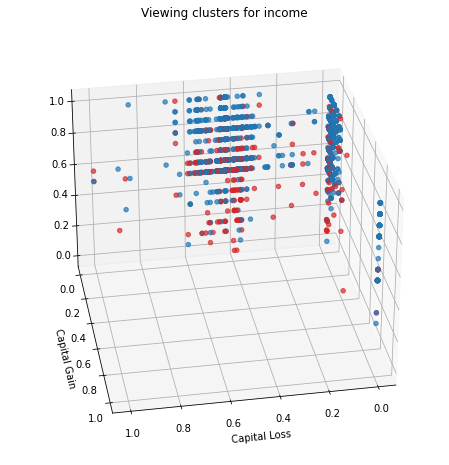

In [44]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = (kmeans_df['capital.loss'][:3000], kmeans_df['capital.gain'][:3000], kmeans_df['education.num'][:3000])
ax.scatter(x, y, z, c=kmean_colors[:3000], alpha=0.7)
ax.view_init(30, 80)
plt.xlabel('Capital Loss')
plt.ylabel('Capital Gain')
plt.title('Viewing clusters for income')

Text(0.5, 0.92, 'Viewing clusters for income')

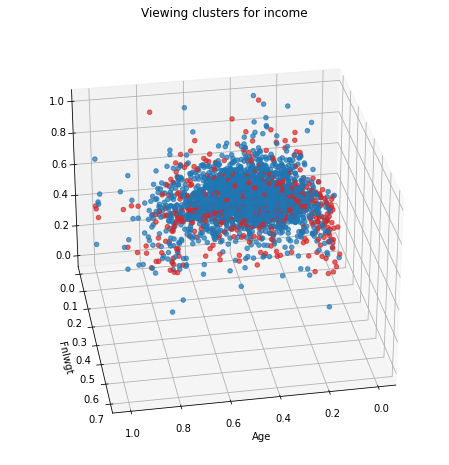

In [46]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = (kmeans_df['age'][:3000], kmeans_df['fnlwgt'][:3000], kmeans_df['hours.per.week'][:3000])
ax.scatter(x, y, z, c=kmean_colors[:3000], alpha=0.7)
ax.view_init(30, 80)
plt.xlabel('Age')
plt.ylabel('Fnlwgt')
plt.title('Viewing clusters for income')

In [15]:
from sklearn.metrics import silhouette_score

In [21]:
silhouette_score(df, kmeans_clusters_2)

0.2207231718718928

In [22]:
# K - 5
kmeans_model_5 = KMeans(n_clusters=5)
kmeans_clusters_5 = kmeans_model_5.fit_predict(df)

In [23]:
pd.DataFrame(kmeans_clusters_5).value_counts()

1    12836
4     7790
2     4099
3     4066
0     3770
dtype: int64

In [24]:
silhouette_score(df, kmeans_clusters_5)

0.3530738217585673

## KMode

In [9]:
from kmodes.kmodes import KModes

Done with k= 1
Done with k= 2
Done with k= 3
Done with k= 4
Done with k= 5
Done with k= 6


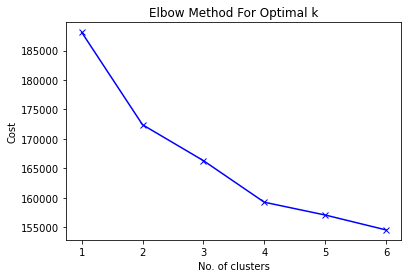

In [27]:
cost = []
K = range(1,7)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)
    print("Done with k=", num_clusters)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

As we can see here that the number of clusters is 2 as after that point the curve becomes linear.

In [10]:
kmode_model = KModes(n_clusters=2, init = "random", n_init = 5)
kmode_clusters = kmode_model.fit_predict(df)

In [11]:
pd.DataFrame(kmode_clusters).value_counts()

1    17738
0    14823
dtype: int64

In [12]:
kmode_df = pd.concat([df, pd.Series(kmode_clusters)], axis=1)
kmode_df.rename(columns={0: 'clusters'}, inplace=True)

In [13]:
kmode_df.head()

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,Race_Amer-Indian-Eskimo,...,Race_Black,Race_Other,Race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,clusters
0,1.000000,0.000000,0.043987,0.533333,0.000000,0.0,0.0,1.000000,0.397959,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.890411,0.857143,0.081896,0.533333,0.000000,0.0,0.0,1.000000,0.173469,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.671233,0.000000,0.118021,0.600000,0.000000,0.0,0.0,1.000000,0.397959,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.506849,0.857143,0.086982,0.200000,0.166667,0.0,0.0,0.895317,0.397959,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.328767,0.857143,0.171404,0.600000,0.333333,0.0,0.0,0.895317,0.397959,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [16]:
silhouette_score(df, kmode_clusters)

0.11063344795702552

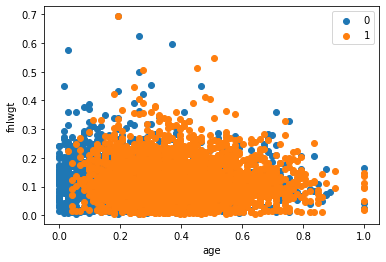

In [32]:
make_cluster_plot(kmode_df[:5000], 2, 'age', 'fnlwgt')

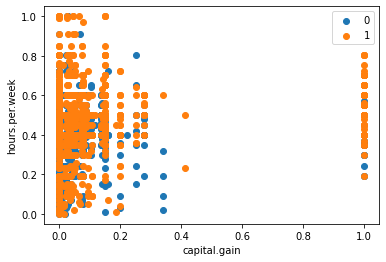

In [33]:
make_cluster_plot(kmode_df[:5000], 2, 'capital.gain', 'hours.per.week')

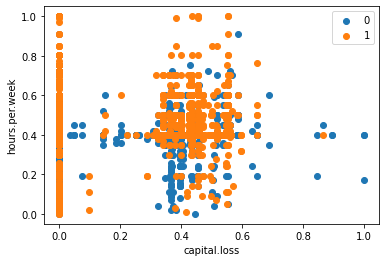

In [34]:
make_cluster_plot(kmode_df[:5000], 2, 'capital.loss', 'hours.per.week')

In [17]:
kmode_colors = []
for cluster in kmode_df['clusters']:
    if(cluster == 0):
        kmode_colors.append('tab:red')
    else:
        kmode_colors.append('tab:blue')

Text(0.5, 0.92, 'Viewing clusters for income')

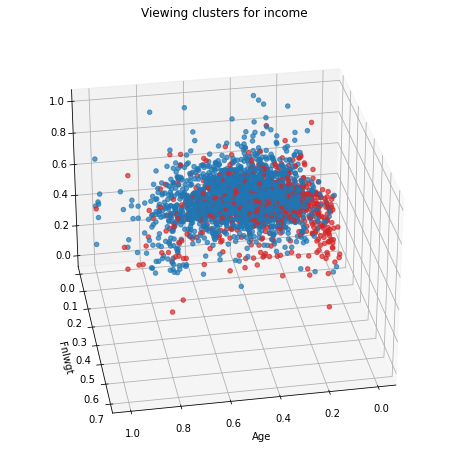

In [18]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = (kmode_df['age'][:3000], kmode_df['fnlwgt'][:3000], kmode_df['hours.per.week'][:3000])
ax.scatter(x, y, z, c=kmode_colors[:3000], alpha=0.7)
ax.view_init(30, 80)
plt.xlabel('Age')
plt.ylabel('Fnlwgt')
plt.title('Viewing clusters for income')

Text(0.5, 0.92, 'Viewing clusters for income')

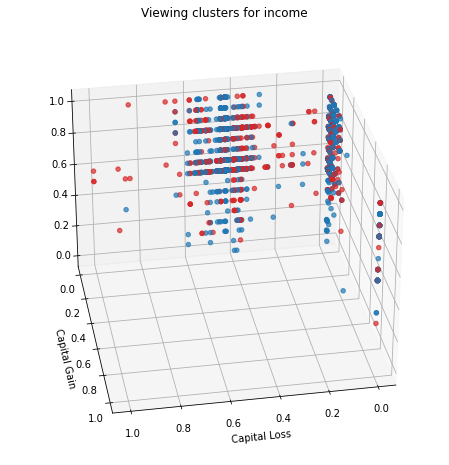

In [48]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = (kmode_df['capital.loss'][:3000],kmode_df['capital.gain'][:3000], kmode_df['education.num'][:3000])
ax.scatter(x, y, z, c=kmode_colors[:3000], alpha=0.7)
ax.view_init(30, 80)
plt.xlabel('Capital Loss')
plt.ylabel('Capital Gain')
plt.title('Viewing clusters for income')

## KMedoids

In [31]:
from sklearn_extra.cluster import KMedoids

In [32]:
model = KMedoids(n_clusters=2)
kmedoid_clusters = model.fit_predict(df)

In [33]:
pd.DataFrame(kmedoid_clusters).value_counts()

0    16481
1    16080
dtype: int64

In [34]:
model.cluster_centers_

array([[0.19178082, 0.85714286, 0.12603401, 0.53333333, 0.5       ,
        1.        , 0.        , 0.        , 0.39795918, 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.38356164, 0.71428571, 0.12303962, 0.6       , 0.83333333,
        1.        , 0.        , 0.        , 0.44897959, 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ]])

In [35]:
kmedoid_df = pd.concat([df, pd.Series(kmedoid_clusters)], axis=1)
kmedoid_df.rename(columns={0: 'clusters'}, inplace=True)
kmedoid_df.head()

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,Race_Amer-Indian-Eskimo,...,Race_Black,Race_Other,Race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,clusters
0,1.000000,0.000000,0.043987,0.533333,0.000000,0.0,0.0,1.000000,0.397959,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.890411,0.857143,0.081896,0.533333,0.000000,0.0,0.0,1.000000,0.173469,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,0.671233,0.000000,0.118021,0.600000,0.000000,0.0,0.0,1.000000,0.397959,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.506849,0.857143,0.086982,0.200000,0.166667,0.0,0.0,0.895317,0.397959,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.328767,0.857143,0.171404,0.600000,0.333333,0.0,0.0,0.895317,0.397959,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0


In [36]:
silhouette_score(df, kmedoid_clusters)

0.0725604091835757

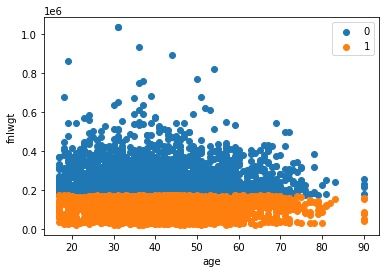

In [16]:
make_cluster_plot(kmedoid_df[:5000], 2, 'age', 'fnlwgt')

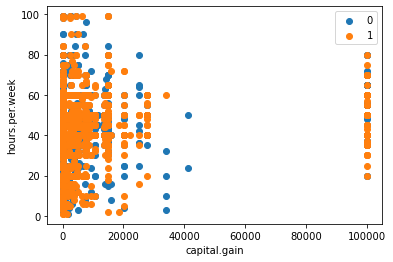

In [17]:
make_cluster_plot(kmedoid_df[:5000], 2, 'capital.gain', 'hours.per.week')

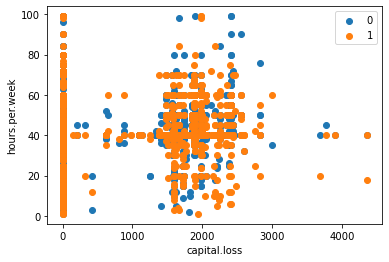

In [18]:
make_cluster_plot(kmedoid_df[:5000], 2, 'capital.loss', 'hours.per.week')

In [43]:
kmedoid_colors = []
for cluster in kmedoid_df['clusters']:
    if(cluster == 0):
        kmedoid_colors.append('tab:red')
    else:
        kmedoid_colors.append('tab:blue')

Text(0.5, 0.92, 'Viewing clusters for income')

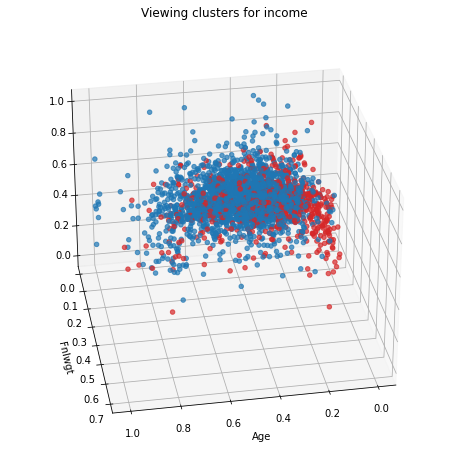

In [47]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = (kmedoid_df['age'][:3000], kmedoid_df['fnlwgt'][:3000], kmedoid_df['hours.per.week'][:3000])
ax.scatter(x, y, z, c=kmedoid_colors[:3000], alpha=0.7)
ax.view_init(30, 80)
plt.xlabel('Age')
plt.ylabel('Fnlwgt')
plt.title('Viewing clusters for income')

Text(0.5, 0.92, 'Viewing clusters for income')

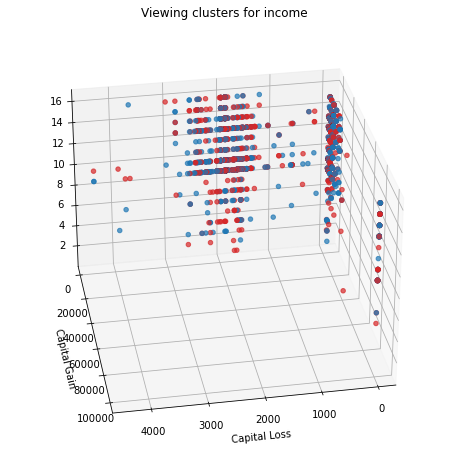

In [24]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = (kmedoid_df['capital.loss'][:3000], kmedoid_df['capital.gain'][:3000], kmedoid_df['education.num'][:3000])
ax.scatter(x, y, z, c=kmedoid_colors[:3000], alpha=0.7)
ax.view_init(30, 80)
plt.xlabel('Capital Loss')
plt.ylabel('Capital Gain')
plt.title('Viewing clusters for income')

## Agglomerative Clustering

In [37]:
agglomerative_model = AgglomerativeClustering(n_clusters=2)
agglomerative_clusters = agglomerative_model.fit_predict(df)

In [38]:
pd.DataFrame(agglomerative_clusters).value_counts()

1    17312
0    15249
dtype: int64

In [39]:
agglomerative_df = pd.concat([df, pd.Series(agglomerative_clusters)], axis=1)
agglomerative_df.rename(columns={0: 'clusters'}, inplace=True)

In [40]:
agglomerative_df.head()

,age,workclass,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,Race_Amer-Indian-Eskimo,...,Race_Black,Race_Other,Race_White,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,clusters
0,1.000000,0.000000,0.043987,0.533333,0.000000,0.0,0.0,1.000000,0.397959,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0.890411,0.857143,0.081896,0.533333,0.000000,0.0,0.0,1.000000,0.173469,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.671233,0.000000,0.118021,0.600000,0.000000,0.0,0.0,1.000000,0.397959,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
3,0.506849,0.857143,0.086982,0.200000,0.166667,0.0,0.0,0.895317,0.397959,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,0.328767,0.857143,0.171404,0.600000,0.333333,0.0,0.0,0.895317,0.397959,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [41]:
silhouette_score(df, agglomerative_clusters)

0.20615607773577022

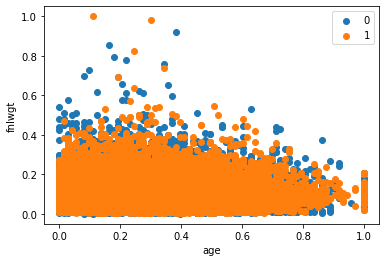

In [24]:
make_cluster_plot(agglomerative_df[:51000], 2, 'age', 'fnlwgt')

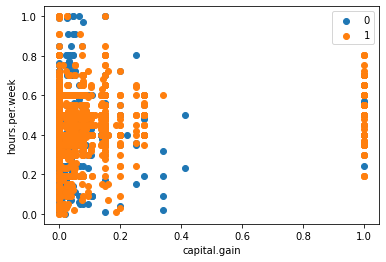

In [18]:
make_cluster_plot(agglomerative_df[:5000], 2, 'capital.gain', 'hours.per.week')

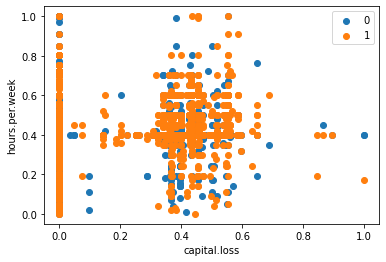

In [19]:
make_cluster_plot(agglomerative_df[:5000], 2, 'capital.loss', 'hours.per.week')

In [20]:
agglomerative_colors = []
for cluster in agglomerative_df['clusters']:
    if(cluster == 0):
        agglomerative_colors.append('tab:red')
    else:
        agglomerative_colors.append('tab:blue')

Text(0.5, 0.92, 'Viewing clusters for income')

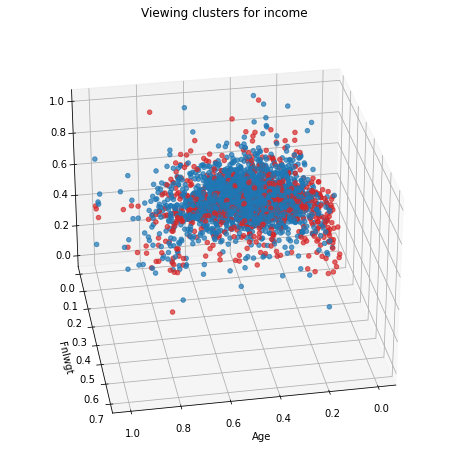

In [21]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = (agglomerative_df['age'][:3000], agglomerative_df['fnlwgt'][:3000], agglomerative_df['hours.per.week'][:3000])
ax.scatter(x, y, z, c=agglomerative_colors[:3000], alpha=0.7)
ax.view_init(30, 80)
plt.xlabel('Age')
plt.ylabel('Fnlwgt')
plt.title('Viewing clusters for income')

Text(0.5, 0.92, 'Viewing clusters for income')

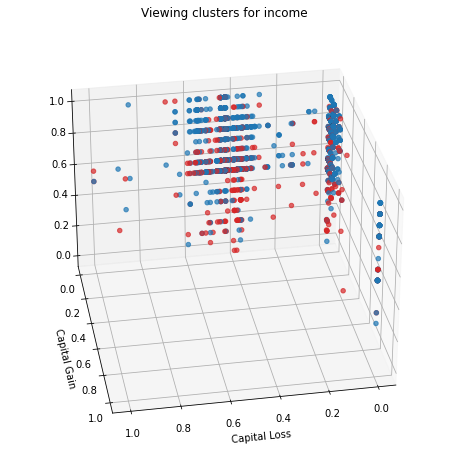

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x, y, z = (agglomerative_df['capital.loss'][:3000], agglomerative_df['capital.gain'][:3000], agglomerative_df['education.num'][:3000])
ax.scatter(x, y, z, c=agglomerative_colors[:3000], alpha=0.7)
ax.view_init(30, 80)
plt.xlabel('Capital Loss')
plt.ylabel('Capital Gain')
plt.title('Viewing clusters for income')

So as we can see that I ran various clustering algorithms on the same dataset and each one performed good in its aspects. Like we can see that as KMediod can handle outliers well so it grouped the dataset into 2 parts with a clear division. While other models like KMeans uses mean to compute new heads so the groups are a little more spare. KMode is good for categorial data which we have a few columns of (After one-hot encoding) so there it understood the under lying patterns well. Agglomertive also performed like KMeans which had a little sparse groups but one drawback in Agglomerative was that as the best n_cluster value is 2 and the dataset is large it needs group till 2 clusters are left which was time consuming and slow process.

In the end I would like to add that as clustering is a unsupervised method we cant tell that one method is clearly better than other. It depends on what criteria you feel is important for your current needs and right for your use case. So here If you want a clear distinction between attributes then we can use KMediod. Where was the importance of categorical data must be more then we must use KMode else KMeans will be better to use (Agglomerative is slow and time consuming model but if gives required results where you want to group individual points then we can go with it).